In [56]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

In [57]:
data = pd.read_csv('boston_housing.csv')

In [58]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [59]:
X = np.array(data.iloc[:, 0:13])
Y = np.array(data.iloc[:,-1]).reshape(-1,1)

### 2.3 implement: Forecasting problem solved by BPN

In [60]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(error,Y):
    return round(((error ** 2).sum() / len(Y))**0.5, 5)*100

class BPN_forecasting():
    def __init__(self,X = X, Y = Y, epochs = 100,learning_rate=0.1, hidden_nodes=2):
        self.X = X
        self.Y = Y
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.input_nodes = len(self.X[0])
        self.hidden_nodes = hidden_nodes
        self.output_nodes = 1
        
        np.random.seed(5) # fix the weights and bias
        self.W1 = np.random.randn(self.hidden_nodes ,self.input_nodes)
        self.W2 = np.random.randn(self.hidden_nodes, self.output_nodes)
        self.B1 = np.random.randn(len(self.X),self.hidden_nodes)
        self.B2 = np.random.randn(len(self.X),self.output_nodes)

    def train(self):
        result = []
        for i in tqdm(range(self.epochs)):
            Hh = sigmoid(self.X.dot(self.W1.T)- self.B1)
            Yj = sigmoid(Hh.dot(self.W2)- self.B2)
            Tj = sigmoid(self.Y)
            predit_error = (Tj-Yj)
            aaa = loss(predit_error, self.Y)
            print(f'epochs: {i}  | loss: {aaa:.3f}')
            result.append(aaa)
            
            delta_j = Yj * (1-Yj)* predit_error
            self.W2 = self.W2 + (self.learning_rate* Hh.T.dot(delta_j))
            self.B2 = self.B2 + (-self.learning_rate * delta_j)
            delta_h = Hh * (1-Hh) * delta_j.dot(self.W2.T)
            self.W1 = self.W1 + (self.learning_rate * delta_h.T.dot(self.X))
            self.B1 = self.B1 + (-self.learning_rate * delta_h)
        return result
    
    def plot(self, result):
        fig = plt.figure(figsize = (5,4))
        plt.plot(result)
        plt.title(f'nodes : {self.hidden_nodes}, learning rates: {self.learning_rate}')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.show()
        fig.savefig(f'plotting/bst_{self.learning_rate}_{self.hidden_nodes}.png')

In [61]:
def BPN_implement(epoch, lr, hidden_nodes):
    BPN = BPN_forecasting(X,Y,epoch, lr, hidden_nodes)
    loss_df = BPN.train()
    BPN.plot(loss_df)

100%|██████████| 1000/1000 [00:00<00:00, 21740.37it/s]

epochs: 0  | loss: 54.650
epochs: 1  | loss: 54.626
epochs: 2  | loss: 54.603
epochs: 3  | loss: 54.580
epochs: 4  | loss: 54.556
epochs: 5  | loss: 54.533
epochs: 6  | loss: 54.510
epochs: 7  | loss: 54.486
epochs: 8  | loss: 54.463
epochs: 9  | loss: 54.440
epochs: 10  | loss: 54.416
epochs: 11  | loss: 54.393
epochs: 12  | loss: 54.370
epochs: 13  | loss: 54.347
epochs: 14  | loss: 54.323
epochs: 15  | loss: 54.300
epochs: 16  | loss: 54.277
epochs: 17  | loss: 54.253
epochs: 18  | loss: 54.230
epochs: 19  | loss: 54.207
epochs: 20  | loss: 54.183
epochs: 21  | loss: 54.160
epochs: 22  | loss: 54.137
epochs: 23  | loss: 54.113
epochs: 24  | loss: 54.090
epochs: 25  | loss: 54.067
epochs: 26  | loss: 54.043
epochs: 27  | loss: 54.020
epochs: 28  | loss: 53.997
epochs: 29  | loss: 53.973
epochs: 30  | loss: 53.950
epochs: 31  | loss: 53.927
epochs: 32  | loss: 53.903
epochs: 33  | loss: 53.880
epochs: 34  | loss: 53.857
epochs: 35  | loss: 53.834
epochs: 36  | loss: 53.810
epochs: 37 

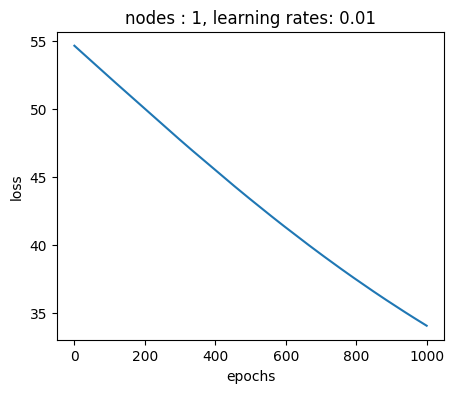

100%|██████████| 1000/1000 [00:00<00:00, 6655.58it/s]


epochs: 0  | loss: 60.348
epochs: 1  | loss: 56.578
epochs: 2  | loss: 53.045
epochs: 3  | loss: 49.468
epochs: 4  | loss: 46.434
epochs: 5  | loss: 40.929
epochs: 6  | loss: 32.159
epochs: 7  | loss: 27.949
epochs: 8  | loss: 24.779
epochs: 9  | loss: 22.331
epochs: 10  | loss: 20.392
epochs: 11  | loss: 18.821
epochs: 12  | loss: 17.522
epochs: 13  | loss: 16.429
epochs: 14  | loss: 15.496
epochs: 15  | loss: 14.689
epochs: 16  | loss: 13.984
epochs: 17  | loss: 13.361
epochs: 18  | loss: 12.806
epochs: 19  | loss: 12.308
epochs: 20  | loss: 11.859
epochs: 21  | loss: 11.451
epochs: 22  | loss: 11.079
epochs: 23  | loss: 10.737
epochs: 24  | loss: 10.422
epochs: 25  | loss: 10.131
epochs: 26  | loss: 9.861
epochs: 27  | loss: 9.609
epochs: 28  | loss: 9.374
epochs: 29  | loss: 9.154
epochs: 30  | loss: 8.947
epochs: 31  | loss: 8.752
epochs: 32  | loss: 8.569
epochs: 33  | loss: 8.395
epochs: 34  | loss: 8.231
epochs: 35  | loss: 8.075
epochs: 36  | loss: 7.927
epochs: 37  | loss: 7.

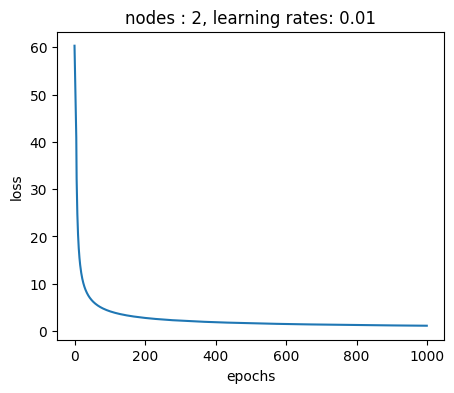

100%|██████████| 1000/1000 [00:00<00:00, 8125.87it/s]

epochs: 0  | loss: 65.117
epochs: 1  | loss: 51.554
epochs: 2  | loss: 39.904
epochs: 3  | loss: 31.696
epochs: 4  | loss: 26.588
epochs: 5  | loss: 21.385
epochs: 6  | loss: 18.708
epochs: 7  | loss: 16.498
epochs: 8  | loss: 15.205
epochs: 9  | loss: 14.187
epochs: 10  | loss: 13.360
epochs: 11  | loss: 12.672
epochs: 12  | loss: 12.088
epochs: 13  | loss: 11.583
epochs: 14  | loss: 11.143
epochs: 15  | loss: 10.753
epochs: 16  | loss: 10.405
epochs: 17  | loss: 10.091
epochs: 18  | loss: 9.807
epochs: 19  | loss: 9.547
epochs: 20  | loss: 9.309
epochs: 21  | loss: 9.089
epochs: 22  | loss: 8.885
epochs: 23  | loss: 8.695
epochs: 24  | loss: 8.518
epochs: 25  | loss: 8.352
epochs: 26  | loss: 8.195
epochs: 27  | loss: 8.048
epochs: 28  | loss: 7.909
epochs: 29  | loss: 7.777
epochs: 30  | loss: 7.652
epochs: 31  | loss: 7.532
epochs: 32  | loss: 7.419
epochs: 33  | loss: 7.310
epochs: 34  | loss: 7.206
epochs: 35  | loss: 7.107
epochs: 36  | loss: 7.012
epochs: 37  | loss: 6.920
epoc

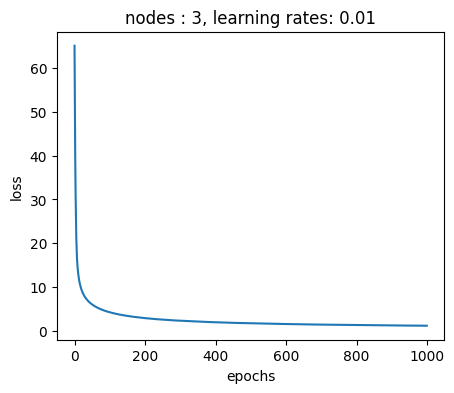

100%|██████████| 1000/1000 [00:00<00:00, 5359.17it/s]

epochs: 0  | loss: 50.615
epochs: 1  | loss: 32.305
epochs: 2  | loss: 22.182
epochs: 3  | loss: 17.865
epochs: 4  | loss: 15.241
epochs: 5  | loss: 13.468
epochs: 6  | loss: 12.220
epochs: 7  | loss: 11.245
epochs: 8  | loss: 10.456
epochs: 9  | loss: 9.801
epochs: 10  | loss: 9.245
epochs: 11  | loss: 8.766
epochs: 12  | loss: 8.349
epochs: 13  | loss: 7.982
epochs: 14  | loss: 7.656
epochs: 15  | loss: 7.364
epochs: 16  | loss: 7.101
epochs: 17  | loss: 6.861
epochs: 18  | loss: 6.639
epochs: 19  | loss: 6.434
epochs: 20  | loss: 6.241
epochs: 21  | loss: 6.053
epochs: 22  | loss: 5.893
epochs: 23  | loss: 5.744
epochs: 24  | loss: 5.606
epochs: 25  | loss: 5.477
epochs: 26  | loss: 5.356
epochs: 27  | loss: 5.241
epochs: 28  | loss: 5.132
epochs: 29  | loss: 5.030
epochs: 30  | loss: 4.934
epochs: 31  | loss: 4.843
epochs: 32  | loss: 4.757
epochs: 33  | loss: 4.675
epochs: 34  | loss: 4.597
epochs: 35  | loss: 4.523
epochs: 36  | loss: 4.452
epochs: 37  | loss: 4.384
epochs: 38  |

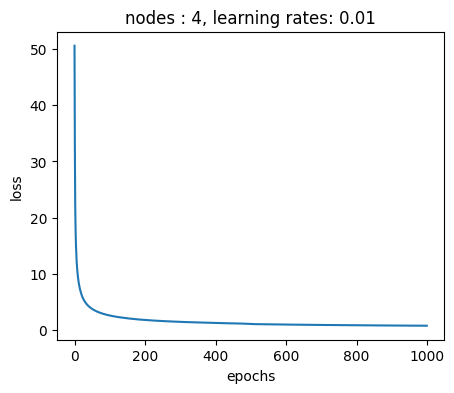

100%|██████████| 1000/1000 [00:00<00:00, 5942.45it/s]

epochs: 0  | loss: 79.188
epochs: 1  | loss: 51.847
epochs: 2  | loss: 19.867
epochs: 3  | loss: 14.407
epochs: 4  | loss: 11.769
epochs: 5  | loss: 10.146
epochs: 6  | loss: 9.023
epochs: 7  | loss: 8.188
epochs: 8  | loss: 7.538
epochs: 9  | loss: 7.014
epochs: 10  | loss: 6.580
epochs: 11  | loss: 6.214
epochs: 12  | loss: 5.899
epochs: 13  | loss: 5.626
epochs: 14  | loss: 5.386
epochs: 15  | loss: 5.172
epochs: 16  | loss: 4.980
epochs: 17  | loss: 4.808
epochs: 18  | loss: 4.651
epochs: 19  | loss: 4.508
epochs: 20  | loss: 4.377
epochs: 21  | loss: 4.256
epochs: 22  | loss: 4.144
epochs: 23  | loss: 4.040
epochs: 24  | loss: 3.943
epochs: 25  | loss: 3.852
epochs: 26  | loss: 3.768
epochs: 27  | loss: 3.688
epochs: 28  | loss: 3.613
epochs: 29  | loss: 3.542
epochs: 30  | loss: 3.475
epochs: 31  | loss: 3.411
epochs: 32  | loss: 3.351
epochs: 33  | loss: 3.293
epochs: 34  | loss: 3.239
epochs: 35  | loss: 3.187
epochs: 36  | loss: 3.137
epochs: 37  | loss: 3.089
epochs: 38  | lo

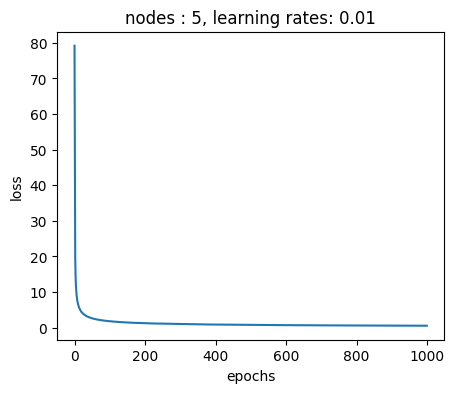

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\bc200\AppData\Local\Temp\ipykernel_23656\1159073752.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
 39%|███▊      | 387/1000 [00:00<00:00, 3853.70it/s]

epochs: 0  | loss: 57.730
epochs: 1  | loss: 15.128
epochs: 2  | loss: 12.184
epochs: 3  | loss: 10.468
epochs: 4  | loss: 9.315
epochs: 5  | loss: 8.465
epochs: 6  | loss: 7.803
epochs: 7  | loss: 7.276
epochs: 8  | loss: 6.808
epochs: 9  | loss: 6.112
epochs: 10  | loss: 5.563
epochs: 11  | loss: 5.234
epochs: 12  | loss: 5.036
epochs: 13  | loss: 4.858
epochs: 14  | loss: 4.696
epochs: 15  | loss: 4.548
epochs: 16  | loss: 4.411
epochs: 17  | loss: 4.284
epochs: 18  | loss: 4.170
epochs: 19  | loss: 4.065
epochs: 20  | loss: 3.966
epochs: 21  | loss: 3.873
epochs: 22  | loss: 3.786
epochs: 23  | loss: 3.705
epochs: 24  | loss: 3.630
epochs: 25  | loss: 3.558
epochs: 26  | loss: 3.490
epochs: 27  | loss: 3.426
epochs: 28  | loss: 3.365
epochs: 29  | loss: 3.307
epochs: 30  | loss: 3.252
epochs: 31  | loss: 3.199
epochs: 32  | loss: 3.149
epochs: 33  | loss: 3.101
epochs: 34  | loss: 3.055
epochs: 35  | loss: 3.010
epochs: 36  | loss: 2.967
epochs: 37  | loss: 2.925
epochs: 38  | loss

100%|██████████| 1000/1000 [00:00<00:00, 4231.38it/s]


epochs: 803  | loss: 0.602
epochs: 804  | loss: 0.601
epochs: 805  | loss: 0.601
epochs: 806  | loss: 0.601
epochs: 807  | loss: 0.600
epochs: 808  | loss: 0.600
epochs: 809  | loss: 0.599
epochs: 810  | loss: 0.599
epochs: 811  | loss: 0.599
epochs: 812  | loss: 0.598
epochs: 813  | loss: 0.598
epochs: 814  | loss: 0.598
epochs: 815  | loss: 0.597
epochs: 816  | loss: 0.597
epochs: 817  | loss: 0.596
epochs: 818  | loss: 0.596
epochs: 819  | loss: 0.596
epochs: 820  | loss: 0.595
epochs: 821  | loss: 0.595
epochs: 822  | loss: 0.595
epochs: 823  | loss: 0.594
epochs: 824  | loss: 0.594
epochs: 825  | loss: 0.593
epochs: 826  | loss: 0.593
epochs: 827  | loss: 0.593
epochs: 828  | loss: 0.592
epochs: 829  | loss: 0.592
epochs: 830  | loss: 0.592
epochs: 831  | loss: 0.591
epochs: 832  | loss: 0.591
epochs: 833  | loss: 0.591
epochs: 834  | loss: 0.590
epochs: 835  | loss: 0.590
epochs: 836  | loss: 0.590
epochs: 837  | loss: 0.589
epochs: 838  | loss: 0.589
epochs: 839  | loss: 0.588
e

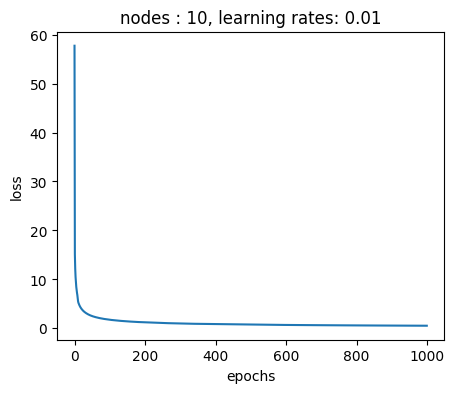

In [62]:
BPN_implement(1000,0.01,1)
BPN_implement(1000,0.01,2)
BPN_implement(1000,0.01,3)
BPN_implement(1000,0.01,4)
BPN_implement(1000,0.01,5)
BPN_implement(1000,0.01,10)

100%|██████████| 1000/1000 [00:00<00:00, 20178.99it/s]

epochs: 0  | loss: 54.650
epochs: 1  | loss: 54.533
epochs: 2  | loss: 54.416
epochs: 3  | loss: 54.300
epochs: 4  | loss: 54.183
epochs: 5  | loss: 54.066
epochs: 6  | loss: 53.950
epochs: 7  | loss: 53.833
epochs: 8  | loss: 53.717
epochs: 9  | loss: 53.600
epochs: 10  | loss: 53.483
epochs: 11  | loss: 53.367
epochs: 12  | loss: 53.250
epochs: 13  | loss: 53.134
epochs: 14  | loss: 53.017
epochs: 15  | loss: 52.900
epochs: 16  | loss: 52.784
epochs: 17  | loss: 52.668
epochs: 18  | loss: 52.551
epochs: 19  | loss: 52.435
epochs: 20  | loss: 52.318
epochs: 21  | loss: 52.202
epochs: 22  | loss: 52.086
epochs: 23  | loss: 51.970
epochs: 24  | loss: 51.853
epochs: 25  | loss: 51.737
epochs: 26  | loss: 51.621
epochs: 27  | loss: 51.505
epochs: 28  | loss: 51.389
epochs: 29  | loss: 51.273
epochs: 30  | loss: 51.157
epochs: 31  | loss: 51.042
epochs: 32  | loss: 50.926
epochs: 33  | loss: 50.810
epochs: 34  | loss: 50.695
epochs: 35  | loss: 50.579
epochs: 36  | loss: 50.464
epochs: 37 

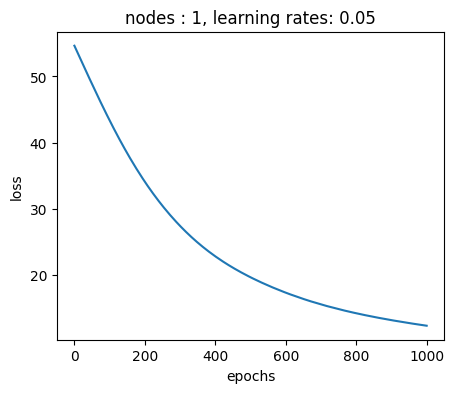

100%|██████████| 1000/1000 [00:00<00:00, 6314.69it/s]

epochs: 0  | loss: 60.348
epochs: 1  | loss: 35.665
epochs: 2  | loss: 16.022
epochs: 3  | loss: 12.011
epochs: 4  | loss: 10.026
epochs: 5  | loss: 8.771
epochs: 6  | loss: 7.882
epochs: 7  | loss: 7.209
epochs: 8  | loss: 6.677
epochs: 9  | loss: 6.243
epochs: 10  | loss: 5.879
epochs: 11  | loss: 5.569
epochs: 12  | loss: 5.300
epochs: 13  | loss: 5.065
epochs: 14  | loss: 4.857
epochs: 15  | loss: 4.671
epochs: 16  | loss: 4.503
epochs: 17  | loss: 4.351
epochs: 18  | loss: 4.213
epochs: 19  | loss: 4.086
epochs: 20  | loss: 3.969
epochs: 21  | loss: 3.861
epochs: 22  | loss: 3.761
epochs: 23  | loss: 3.667
epochs: 24  | loss: 3.580
epochs: 25  | loss: 3.498
epochs: 26  | loss: 3.422
epochs: 27  | loss: 3.350
epochs: 28  | loss: 3.282
epochs: 29  | loss: 3.217
epochs: 30  | loss: 3.156
epochs: 31  | loss: 3.098
epochs: 32  | loss: 3.044
epochs: 33  | loss: 2.991
epochs: 34  | loss: 2.941
epochs: 35  | loss: 2.894
epochs: 36  | loss: 2.848
epochs: 37  | loss: 2.805
epochs: 38  | los

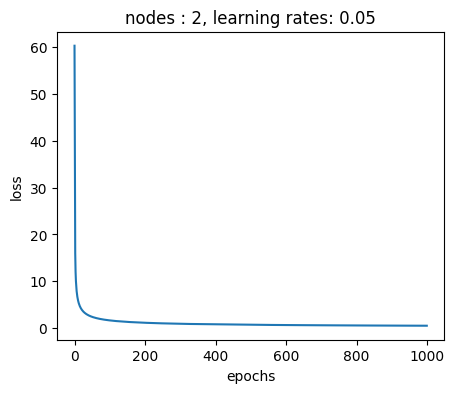

100%|██████████| 1000/1000 [00:00<00:00, 9065.00it/s]

epochs: 0  | loss: 65.117
epochs: 1  | loss: 8.733
epochs: 2  | loss: 7.887
epochs: 3  | loss: 7.267
epochs: 4  | loss: 6.782
epochs: 5  | loss: 6.386
epochs: 6  | loss: 6.053
epochs: 7  | loss: 5.766
epochs: 8  | loss: 5.516
epochs: 9  | loss: 5.294
epochs: 10  | loss: 5.096
epochs: 11  | loss: 4.917
epochs: 12  | loss: 4.754
epochs: 13  | loss: 4.605
epochs: 14  | loss: 4.468
epochs: 15  | loss: 4.342
epochs: 16  | loss: 4.225
epochs: 17  | loss: 4.115
epochs: 18  | loss: 4.013
epochs: 19  | loss: 3.917
epochs: 20  | loss: 3.827
epochs: 21  | loss: 3.743
epochs: 22  | loss: 3.663
epochs: 23  | loss: 3.587
epochs: 24  | loss: 3.515
epochs: 25  | loss: 3.447
epochs: 26  | loss: 3.383
epochs: 27  | loss: 3.321
epochs: 28  | loss: 3.262
epochs: 29  | loss: 3.206
epochs: 30  | loss: 3.153
epochs: 31  | loss: 3.101
epochs: 32  | loss: 3.052
epochs: 33  | loss: 3.005
epochs: 34  | loss: 2.959
epochs: 35  | loss: 2.916
epochs: 36  | loss: 2.874
epochs: 37  | loss: 2.834
epochs: 38  | loss: 2

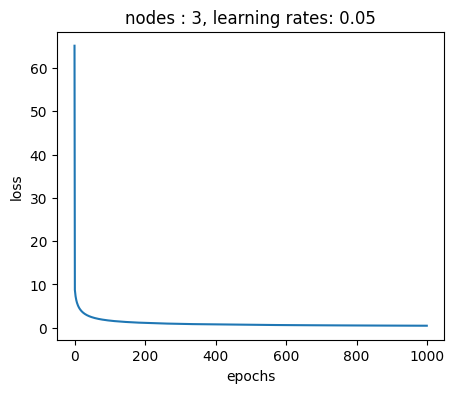

100%|██████████| 1000/1000 [00:00<00:00, 7967.10it/s]


epochs: 0  | loss: 50.615
epochs: 1  | loss: 1.228
epochs: 2  | loss: 1.219
epochs: 3  | loss: 1.209
epochs: 4  | loss: 1.198
epochs: 5  | loss: 1.178
epochs: 6  | loss: 1.161
epochs: 7  | loss: 1.145
epochs: 8  | loss: 1.135
epochs: 9  | loss: 1.124
epochs: 10  | loss: 1.102
epochs: 11  | loss: 1.076
epochs: 12  | loss: 1.065
epochs: 13  | loss: 1.059
epochs: 14  | loss: 1.053
epochs: 15  | loss: 1.047
epochs: 16  | loss: 1.041
epochs: 17  | loss: 1.035
epochs: 18  | loss: 1.030
epochs: 19  | loss: 1.024
epochs: 20  | loss: 1.019
epochs: 21  | loss: 1.014
epochs: 22  | loss: 1.008
epochs: 23  | loss: 1.003
epochs: 24  | loss: 0.998
epochs: 25  | loss: 0.993
epochs: 26  | loss: 0.988
epochs: 27  | loss: 0.983
epochs: 28  | loss: 0.978
epochs: 29  | loss: 0.974
epochs: 30  | loss: 0.969
epochs: 31  | loss: 0.964
epochs: 32  | loss: 0.960
epochs: 33  | loss: 0.955
epochs: 34  | loss: 0.951
epochs: 35  | loss: 0.946
epochs: 36  | loss: 0.942
epochs: 37  | loss: 0.938
epochs: 38  | loss: 0

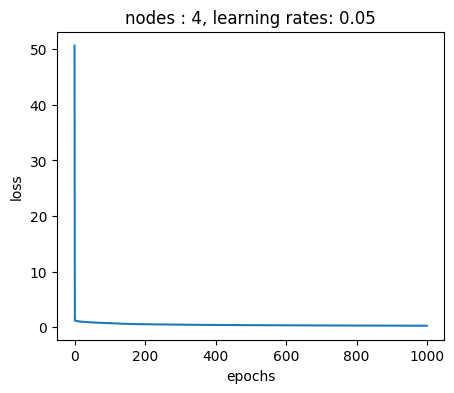

100%|██████████| 1000/1000 [00:00<00:00, 6206.99it/s]


epochs: 0  | loss: 79.188
epochs: 1  | loss: 0.423
epochs: 2  | loss: 0.423
epochs: 3  | loss: 0.422
epochs: 4  | loss: 0.421
epochs: 5  | loss: 0.421
epochs: 6  | loss: 0.420
epochs: 7  | loss: 0.419
epochs: 8  | loss: 0.419
epochs: 9  | loss: 0.418
epochs: 10  | loss: 0.417
epochs: 11  | loss: 0.417
epochs: 12  | loss: 0.416
epochs: 13  | loss: 0.415
epochs: 14  | loss: 0.415
epochs: 15  | loss: 0.414
epochs: 16  | loss: 0.414
epochs: 17  | loss: 0.413
epochs: 18  | loss: 0.412
epochs: 19  | loss: 0.412
epochs: 20  | loss: 0.411
epochs: 21  | loss: 0.410
epochs: 22  | loss: 0.410
epochs: 23  | loss: 0.409
epochs: 24  | loss: 0.409
epochs: 25  | loss: 0.408
epochs: 26  | loss: 0.407
epochs: 27  | loss: 0.407
epochs: 28  | loss: 0.406
epochs: 29  | loss: 0.406
epochs: 30  | loss: 0.405
epochs: 31  | loss: 0.404
epochs: 32  | loss: 0.404
epochs: 33  | loss: 0.403
epochs: 34  | loss: 0.403
epochs: 35  | loss: 0.402
epochs: 36  | loss: 0.402
epochs: 37  | loss: 0.401
epochs: 38  | loss: 0

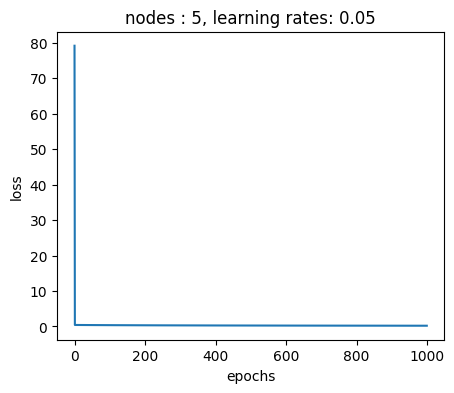

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\bc200\AppData\Local\Temp\ipykernel_23656\1159073752.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
 46%|████▋     | 464/1000 [00:00<00:00, 4635.32it/s]

epochs: 0  | loss: 57.730
epochs: 1  | loss: 0.058
epochs: 2  | loss: 0.058
epochs: 3  | loss: 0.058
epochs: 4  | loss: 0.058
epochs: 5  | loss: 0.058
epochs: 6  | loss: 0.058
epochs: 7  | loss: 0.058
epochs: 8  | loss: 0.058
epochs: 9  | loss: 0.058
epochs: 10  | loss: 0.058
epochs: 11  | loss: 0.058
epochs: 12  | loss: 0.058
epochs: 13  | loss: 0.058
epochs: 14  | loss: 0.058
epochs: 15  | loss: 0.058
epochs: 16  | loss: 0.058
epochs: 17  | loss: 0.058
epochs: 18  | loss: 0.058
epochs: 19  | loss: 0.058
epochs: 20  | loss: 0.058
epochs: 21  | loss: 0.058
epochs: 22  | loss: 0.058
epochs: 23  | loss: 0.058
epochs: 24  | loss: 0.058
epochs: 25  | loss: 0.058
epochs: 26  | loss: 0.058
epochs: 27  | loss: 0.058
epochs: 28  | loss: 0.058
epochs: 29  | loss: 0.058
epochs: 30  | loss: 0.058
epochs: 31  | loss: 0.058
epochs: 32  | loss: 0.058
epochs: 33  | loss: 0.058
epochs: 34  | loss: 0.058
epochs: 35  | loss: 0.058
epochs: 36  | loss: 0.058
epochs: 37  | loss: 0.058
epochs: 38  | loss: 0

100%|██████████| 1000/1000 [00:00<00:00, 4445.76it/s]


epochs: 866  | loss: 0.058
epochs: 867  | loss: 0.058
epochs: 868  | loss: 0.058
epochs: 869  | loss: 0.058
epochs: 870  | loss: 0.058
epochs: 871  | loss: 0.058
epochs: 872  | loss: 0.058
epochs: 873  | loss: 0.058
epochs: 874  | loss: 0.058
epochs: 875  | loss: 0.058
epochs: 876  | loss: 0.058
epochs: 877  | loss: 0.058
epochs: 878  | loss: 0.058
epochs: 879  | loss: 0.058
epochs: 880  | loss: 0.058
epochs: 881  | loss: 0.058
epochs: 882  | loss: 0.058
epochs: 883  | loss: 0.058
epochs: 884  | loss: 0.058
epochs: 885  | loss: 0.058
epochs: 886  | loss: 0.058
epochs: 887  | loss: 0.058
epochs: 888  | loss: 0.058
epochs: 889  | loss: 0.058
epochs: 890  | loss: 0.058
epochs: 891  | loss: 0.058
epochs: 892  | loss: 0.058
epochs: 893  | loss: 0.058
epochs: 894  | loss: 0.058
epochs: 895  | loss: 0.058
epochs: 896  | loss: 0.058
epochs: 897  | loss: 0.058
epochs: 898  | loss: 0.058
epochs: 899  | loss: 0.058
epochs: 900  | loss: 0.058
epochs: 901  | loss: 0.058
epochs: 902  | loss: 0.058
e

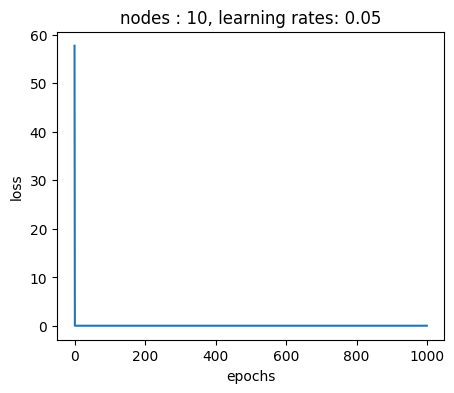

In [63]:
BPN_implement(1000,0.05,1)
BPN_implement(1000,0.05,2)
BPN_implement(1000,0.05,3)
BPN_implement(1000,0.05,4)
BPN_implement(1000,0.05,5)
BPN_implement(1000,0.05,10)

100%|██████████| 1000/1000 [00:00<00:00, 20737.70it/s]

epochs: 0  | loss: 54.650
epochs: 1  | loss: 53.948
epochs: 2  | loss: 53.246
epochs: 3  | loss: 52.546
epochs: 4  | loss: 51.846
epochs: 5  | loss: 51.148
epochs: 6  | loss: 50.452
epochs: 7  | loss: 49.760
epochs: 8  | loss: 49.071
epochs: 9  | loss: 48.385
epochs: 10  | loss: 47.705
epochs: 11  | loss: 47.029
epochs: 12  | loss: 46.359
epochs: 13  | loss: 45.694
epochs: 14  | loss: 45.036
epochs: 15  | loss: 44.385
epochs: 16  | loss: 43.742
epochs: 17  | loss: 43.105
epochs: 18  | loss: 42.477
epochs: 19  | loss: 41.857
epochs: 20  | loss: 41.246
epochs: 21  | loss: 40.643
epochs: 22  | loss: 40.050
epochs: 23  | loss: 39.466
epochs: 24  | loss: 38.892
epochs: 25  | loss: 38.327
epochs: 26  | loss: 37.772
epochs: 27  | loss: 37.227
epochs: 28  | loss: 36.692
epochs: 29  | loss: 36.167
epochs: 30  | loss: 35.652
epochs: 31  | loss: 35.147
epochs: 32  | loss: 34.652
epochs: 33  | loss: 34.166
epochs: 34  | loss: 33.691
epochs: 35  | loss: 33.225
epochs: 36  | loss: 32.769
epochs: 37 

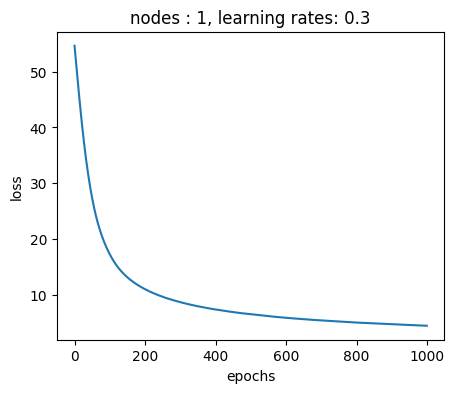

100%|██████████| 1000/1000 [00:00<00:00, 7457.50it/s]


epochs: 0  | loss: 60.348
epochs: 1  | loss: 0.057
epochs: 2  | loss: 0.057
epochs: 3  | loss: 0.057
epochs: 4  | loss: 0.057
epochs: 5  | loss: 0.057
epochs: 6  | loss: 0.057
epochs: 7  | loss: 0.057
epochs: 8  | loss: 0.057
epochs: 9  | loss: 0.057
epochs: 10  | loss: 0.057
epochs: 11  | loss: 0.057
epochs: 12  | loss: 0.057
epochs: 13  | loss: 0.057
epochs: 14  | loss: 0.057
epochs: 15  | loss: 0.057
epochs: 16  | loss: 0.057
epochs: 17  | loss: 0.057
epochs: 18  | loss: 0.057
epochs: 19  | loss: 0.057
epochs: 20  | loss: 0.057
epochs: 21  | loss: 0.057
epochs: 22  | loss: 0.057
epochs: 23  | loss: 0.057
epochs: 24  | loss: 0.057
epochs: 25  | loss: 0.057
epochs: 26  | loss: 0.057
epochs: 27  | loss: 0.057
epochs: 28  | loss: 0.057
epochs: 29  | loss: 0.057
epochs: 30  | loss: 0.057
epochs: 31  | loss: 0.057
epochs: 32  | loss: 0.057
epochs: 33  | loss: 0.057
epochs: 34  | loss: 0.057
epochs: 35  | loss: 0.057
epochs: 36  | loss: 0.057
epochs: 37  | loss: 0.057
epochs: 38  | loss: 0

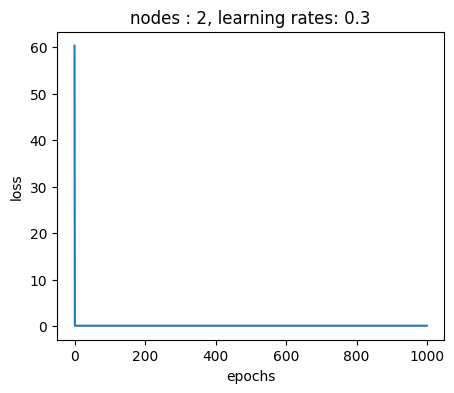

100%|██████████| 1000/1000 [00:00<00:00, 6527.34it/s]

epochs: 0  | loss: 65.117
epochs: 1  | loss: 0.049
epochs: 2  | loss: 0.049
epochs: 3  | loss: 0.049
epochs: 4  | loss: 0.049
epochs: 5  | loss: 0.049
epochs: 6  | loss: 0.049
epochs: 7  | loss: 0.049
epochs: 8  | loss: 0.049
epochs: 9  | loss: 0.049
epochs: 10  | loss: 0.049
epochs: 11  | loss: 0.049
epochs: 12  | loss: 0.049
epochs: 13  | loss: 0.049
epochs: 14  | loss: 0.049
epochs: 15  | loss: 0.049
epochs: 16  | loss: 0.049
epochs: 17  | loss: 0.049
epochs: 18  | loss: 0.049
epochs: 19  | loss: 0.049
epochs: 20  | loss: 0.049
epochs: 21  | loss: 0.049
epochs: 22  | loss: 0.049
epochs: 23  | loss: 0.049
epochs: 24  | loss: 0.049
epochs: 25  | loss: 0.049
epochs: 26  | loss: 0.049
epochs: 27  | loss: 0.049
epochs: 28  | loss: 0.049
epochs: 29  | loss: 0.049
epochs: 30  | loss: 0.049
epochs: 31  | loss: 0.049
epochs: 32  | loss: 0.049
epochs: 33  | loss: 0.049
epochs: 34  | loss: 0.049
epochs: 35  | loss: 0.049
epochs: 36  | loss: 0.049
epochs: 37  | loss: 0.049
epochs: 38  | loss: 0

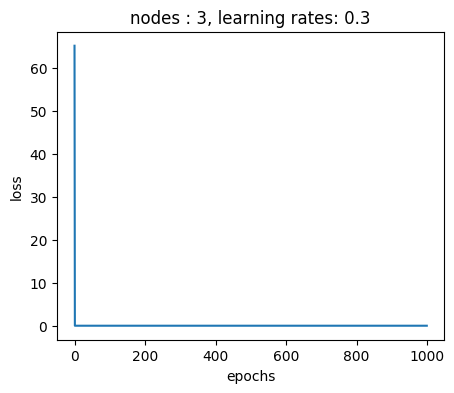

100%|██████████| 1000/1000 [00:00<00:00, 6374.86it/s]

epochs: 0  | loss: 50.615
epochs: 1  | loss: 0.049
epochs: 2  | loss: 0.049
epochs: 3  | loss: 0.049
epochs: 4  | loss: 0.049
epochs: 5  | loss: 0.049
epochs: 6  | loss: 0.049
epochs: 7  | loss: 0.049
epochs: 8  | loss: 0.049
epochs: 9  | loss: 0.049
epochs: 10  | loss: 0.049
epochs: 11  | loss: 0.049
epochs: 12  | loss: 0.049
epochs: 13  | loss: 0.049
epochs: 14  | loss: 0.049
epochs: 15  | loss: 0.049
epochs: 16  | loss: 0.049
epochs: 17  | loss: 0.049
epochs: 18  | loss: 0.049
epochs: 19  | loss: 0.049
epochs: 20  | loss: 0.049
epochs: 21  | loss: 0.049
epochs: 22  | loss: 0.049
epochs: 23  | loss: 0.049
epochs: 24  | loss: 0.049
epochs: 25  | loss: 0.049
epochs: 26  | loss: 0.049
epochs: 27  | loss: 0.049
epochs: 28  | loss: 0.049
epochs: 29  | loss: 0.049
epochs: 30  | loss: 0.049
epochs: 31  | loss: 0.049
epochs: 32  | loss: 0.049
epochs: 33  | loss: 0.049
epochs: 34  | loss: 0.049
epochs: 35  | loss: 0.049
epochs: 36  | loss: 0.049
epochs: 37  | loss: 0.049
epochs: 38  | loss: 0

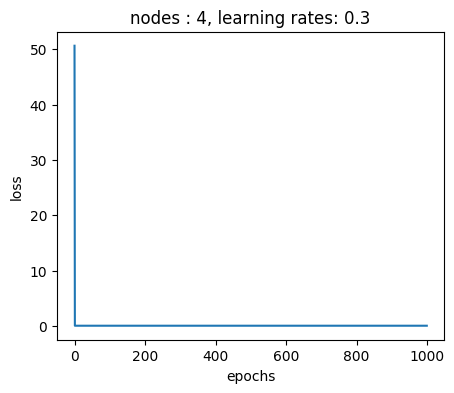

100%|██████████| 1000/1000 [00:00<00:00, 5875.40it/s]

epochs: 0  | loss: 79.188
epochs: 1  | loss: 0.049
epochs: 2  | loss: 0.049
epochs: 3  | loss: 0.049
epochs: 4  | loss: 0.049
epochs: 5  | loss: 0.049
epochs: 6  | loss: 0.049
epochs: 7  | loss: 0.049
epochs: 8  | loss: 0.049
epochs: 9  | loss: 0.049
epochs: 10  | loss: 0.049
epochs: 11  | loss: 0.049
epochs: 12  | loss: 0.049
epochs: 13  | loss: 0.049
epochs: 14  | loss: 0.049
epochs: 15  | loss: 0.049
epochs: 16  | loss: 0.049
epochs: 17  | loss: 0.049
epochs: 18  | loss: 0.049
epochs: 19  | loss: 0.049
epochs: 20  | loss: 0.049
epochs: 21  | loss: 0.049
epochs: 22  | loss: 0.049
epochs: 23  | loss: 0.049
epochs: 24  | loss: 0.049
epochs: 25  | loss: 0.049
epochs: 26  | loss: 0.049
epochs: 27  | loss: 0.049
epochs: 28  | loss: 0.049
epochs: 29  | loss: 0.049
epochs: 30  | loss: 0.049
epochs: 31  | loss: 0.049
epochs: 32  | loss: 0.049
epochs: 33  | loss: 0.049
epochs: 34  | loss: 0.049
epochs: 35  | loss: 0.049
epochs: 36  | loss: 0.049
epochs: 37  | loss: 0.049
epochs: 38  | loss: 0

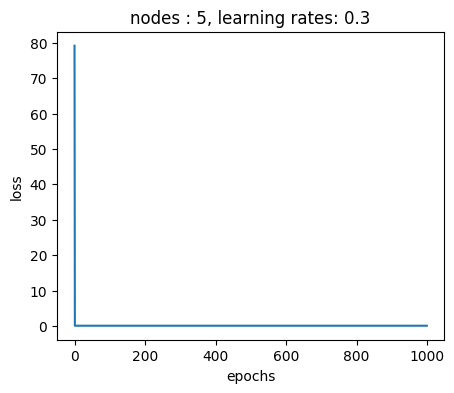

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\bc200\AppData\Local\Temp\ipykernel_23656\1159073752.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
 31%|███▏      | 314/1000 [00:00<00:00, 3133.82it/s]

epochs: 0  | loss: 57.730
epochs: 1  | loss: 0.049
epochs: 2  | loss: 0.049
epochs: 3  | loss: 0.049
epochs: 4  | loss: 0.049
epochs: 5  | loss: 0.049
epochs: 6  | loss: 0.049
epochs: 7  | loss: 0.049
epochs: 8  | loss: 0.049
epochs: 9  | loss: 0.049
epochs: 10  | loss: 0.049
epochs: 11  | loss: 0.049
epochs: 12  | loss: 0.049
epochs: 13  | loss: 0.049
epochs: 14  | loss: 0.049
epochs: 15  | loss: 0.049
epochs: 16  | loss: 0.049
epochs: 17  | loss: 0.049
epochs: 18  | loss: 0.049
epochs: 19  | loss: 0.049
epochs: 20  | loss: 0.049
epochs: 21  | loss: 0.049
epochs: 22  | loss: 0.049
epochs: 23  | loss: 0.049
epochs: 24  | loss: 0.049
epochs: 25  | loss: 0.049
epochs: 26  | loss: 0.049
epochs: 27  | loss: 0.049
epochs: 28  | loss: 0.049
epochs: 29  | loss: 0.049
epochs: 30  | loss: 0.049
epochs: 31  | loss: 0.049
epochs: 32  | loss: 0.049
epochs: 33  | loss: 0.049
epochs: 34  | loss: 0.049
epochs: 35  | loss: 0.049
epochs: 36  | loss: 0.049
epochs: 37  | loss: 0.049
epochs: 38  | loss: 0

100%|██████████| 1000/1000 [00:00<00:00, 3221.65it/s]

epochs: 585  | loss: 0.049
epochs: 586  | loss: 0.049
epochs: 587  | loss: 0.049
epochs: 588  | loss: 0.049
epochs: 589  | loss: 0.049
epochs: 590  | loss: 0.049
epochs: 591  | loss: 0.049
epochs: 592  | loss: 0.049
epochs: 593  | loss: 0.049
epochs: 594  | loss: 0.049
epochs: 595  | loss: 0.049
epochs: 596  | loss: 0.049
epochs: 597  | loss: 0.049
epochs: 598  | loss: 0.049
epochs: 599  | loss: 0.049
epochs: 600  | loss: 0.049
epochs: 601  | loss: 0.049
epochs: 602  | loss: 0.049
epochs: 603  | loss: 0.049
epochs: 604  | loss: 0.049
epochs: 605  | loss: 0.049
epochs: 606  | loss: 0.049
epochs: 607  | loss: 0.049
epochs: 608  | loss: 0.049
epochs: 609  | loss: 0.049
epochs: 610  | loss: 0.049
epochs: 611  | loss: 0.049
epochs: 612  | loss: 0.049
epochs: 613  | loss: 0.049
epochs: 614  | loss: 0.049
epochs: 615  | loss: 0.049
epochs: 616  | loss: 0.049
epochs: 617  | loss: 0.049
epochs: 618  | loss: 0.049
epochs: 619  | loss: 0.049
epochs: 620  | loss: 0.049
epochs: 621  | loss: 0.049
e

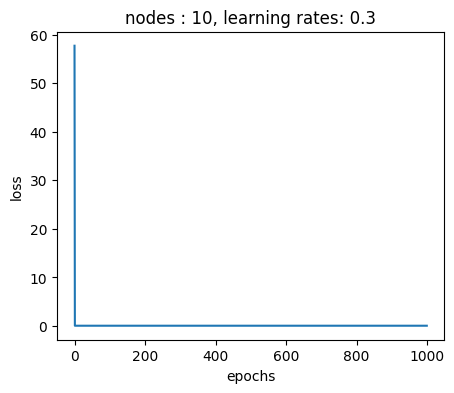

In [64]:
BPN_implement(1000,0.3,1)
BPN_implement(1000,0.3,2)
BPN_implement(1000,0.3,3)
BPN_implement(1000,0.3,4)
BPN_implement(1000,0.3,5)
BPN_implement(1000,0.3,10)